# 31 - Experimental Design Fundamentals

**Key Idea:** To test if something works, you need a **fair comparison**.

Think of it like testing plant food: You can't just use it on roses and not daisies. You need similar plants, half with food, half without.

## Four Essential Components:

1. **Control Group:** Gets nothing (or the old version)
2. **Treatment Group:** Gets the new thing being tested
3. **Random Assignment:** Make sure groups are similar at the start
4. **Avoid Confounds:** Don't change other things at the same time

**Why it matters:** Without proper experimental design, you can't tell if your results are real or just coincidence!

## Simple Example: Testing Plant Food

You have 20 similar plants. Does the new plant food actually help them grow taller?

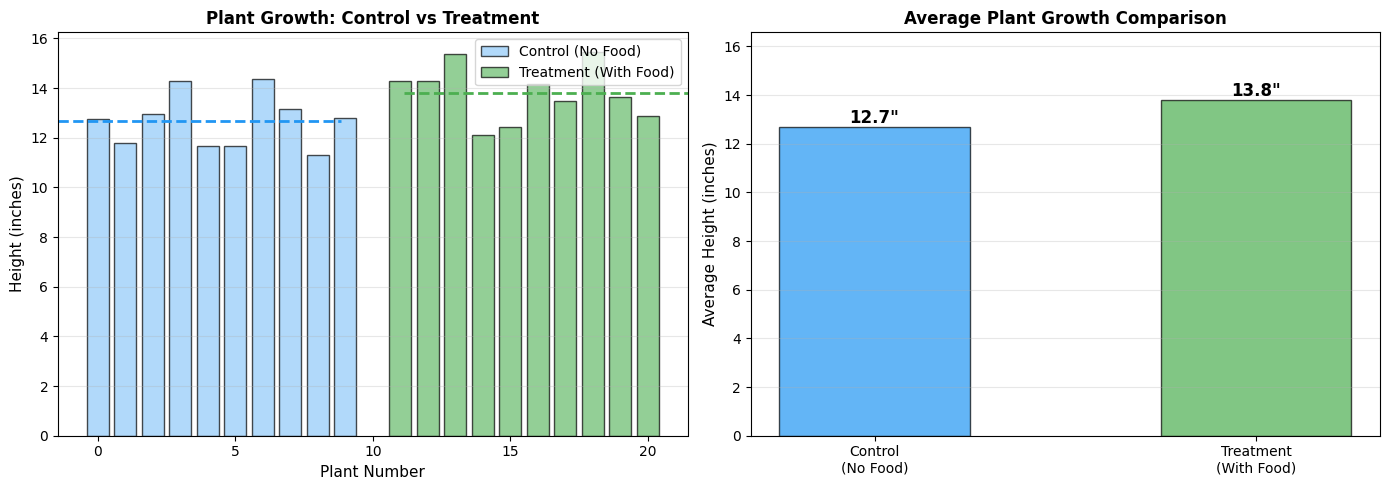


🌱 Experimental Results:
   Control Group Average: 12.7 inches
   Treatment Group Average: 13.8 inches
   Difference: 1.1 inches

✅ Good Experimental Design:
   → Both groups got same sunlight, water, soil
   → Plants randomly assigned to groups
   → ONLY difference was the plant food
   → Therefore, we can conclude the food caused the growth!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 20 plants - randomly assign to control or treatment
n_plants = 20

# Control group: normal growth (mean 12 inches, some variation)
control_growth = np.random.normal(12, 1.5, n_plants // 2)

# Treatment group: plant food adds 3 inches on average
treatment_growth = np.random.normal(15, 1.5, n_plants // 2)

# Visualize the experiment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Individual plant heights
x_control = np.arange(len(control_growth))
x_treatment = np.arange(len(treatment_growth))

ax1.bar(x_control, control_growth, color='#90CAF9', alpha=0.7, edgecolor='black', label='Control (No Food)')
ax1.bar(x_treatment + len(control_growth) + 1, treatment_growth, color='#66BB6A', alpha=0.7, edgecolor='black', label='Treatment (With Food)')
ax1.axhline(np.mean(control_growth), color='#2196F3', linestyle='--', linewidth=2, xmin=0, xmax=0.45)
ax1.axhline(np.mean(treatment_growth), color='#4CAF50', linestyle='--', linewidth=2, xmin=0.55, xmax=1)
ax1.set_xlabel('Plant Number', fontsize=11)
ax1.set_ylabel('Height (inches)', fontsize=11)
ax1.set_title('Plant Growth: Control vs Treatment', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Comparison of averages
groups = ['Control\n(No Food)', 'Treatment\n(With Food)']
means = [np.mean(control_growth), np.mean(treatment_growth)]
colors = ['#2196F3', '#4CAF50']

bars = ax2.bar(groups, means, color=colors, alpha=0.7, edgecolor='black', width=0.5)
ax2.set_ylabel('Average Height (inches)', fontsize=11)
ax2.set_title('Average Plant Growth Comparison', fontsize=12, fontweight='bold')
ax2.set_ylim([0, max(means) * 1.2])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, mean in zip(bars, means):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.1f}"',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n🌱 Experimental Results:")
print(f"   Control Group Average: {np.mean(control_growth):.1f} inches")
print(f"   Treatment Group Average: {np.mean(treatment_growth):.1f} inches")
print(f"   Difference: {np.mean(treatment_growth) - np.mean(control_growth):.1f} inches")

print("\n✅ Good Experimental Design:")
print("   → Both groups got same sunlight, water, soil")
print("   → Plants randomly assigned to groups")
print("   → ONLY difference was the plant food")
print("   → Therefore, we can conclude the food caused the growth!")

## Real-World Example: Employee Training Program

A company tests a new training program. They randomly assign 200 employees to either receive training or not, then measure performance after 3 months.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62769/4219354123.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot([control_improvement, treatment_improvement],


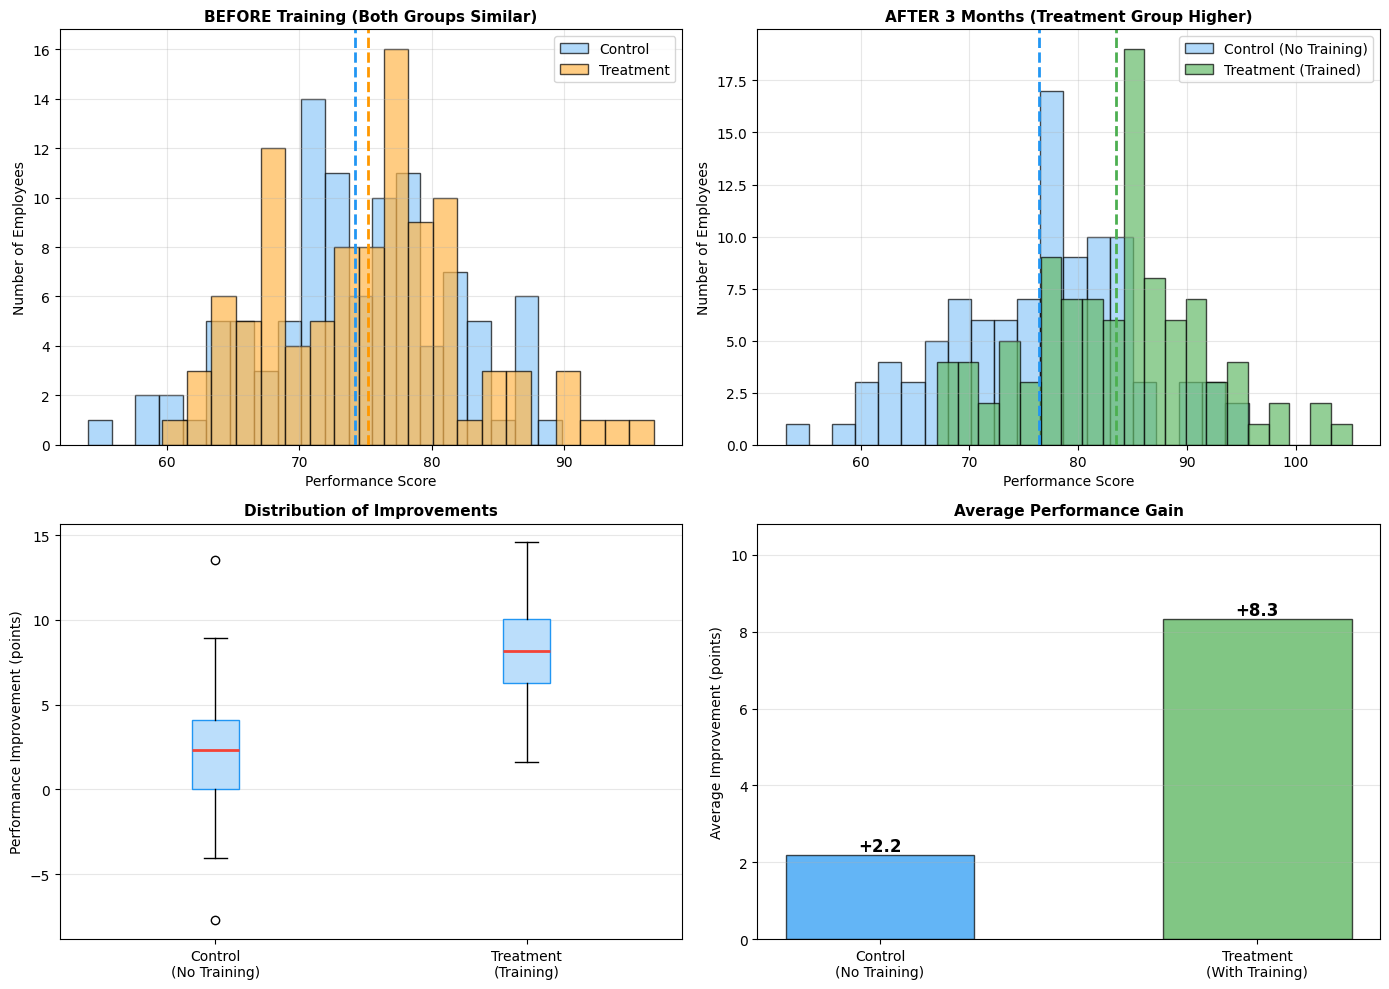


📊 Experimental Results:
   Control Group (n=100):
      Before: 74.2 points
      After: 76.4 points
      Improvement: +2.2 points

   Treatment Group (n=100):
      Before: 75.2 points
      After: 83.5 points
      Improvement: +8.3 points

   📈 Training Effect: +6.1 points extra improvement

✅ Why This Design Works:
   → Random assignment → Groups were similar at start
   → Control group → Shows natural improvement over time
   → Only difference was training → Can conclude it caused the gain
   → No confounds → Same work environment, schedules, managers

💼 Business Decision:
   → Training produces 6.1 points extra improvement
   → If training costs $1,000/person and improvement is worth $5,000...
   → ROI: $4,000 net benefit per employee → INVEST in training!


In [2]:
# Simulate employee performance experiment
np.random.seed(42)

n_employees = 200

# BEFORE training: both groups have similar performance (70-80 score)
control_before = np.random.normal(75, 8, n_employees // 2)
treatment_before = np.random.normal(75, 8, n_employees // 2)

# AFTER 3 months:
# Control: slight natural improvement (+2 points)
control_after = control_before + np.random.normal(2, 3, n_employees // 2)

# Treatment: training boost (+8 points)
treatment_after = treatment_before + np.random.normal(8, 3, n_employees // 2)

# Calculate improvements
control_improvement = control_after - control_before
treatment_improvement = treatment_after - treatment_before

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Before training comparison
ax1 = axes[0, 0]
ax1.hist(control_before, bins=20, color='#90CAF9', alpha=0.7, edgecolor='black', label='Control')
ax1.hist(treatment_before, bins=20, color='#FFB74D', alpha=0.7, edgecolor='black', label='Treatment')
ax1.axvline(np.mean(control_before), color='#2196F3', linestyle='--', linewidth=2)
ax1.axvline(np.mean(treatment_before), color='#FF9800', linestyle='--', linewidth=2)
ax1.set_xlabel('Performance Score', fontsize=10)
ax1.set_ylabel('Number of Employees', fontsize=10)
ax1.set_title('BEFORE Training (Both Groups Similar)', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# After training comparison
ax2 = axes[0, 1]
ax2.hist(control_after, bins=20, color='#90CAF9', alpha=0.7, edgecolor='black', label='Control (No Training)')
ax2.hist(treatment_after, bins=20, color='#66BB6A', alpha=0.7, edgecolor='black', label='Treatment (Trained)')
ax2.axvline(np.mean(control_after), color='#2196F3', linestyle='--', linewidth=2)
ax2.axvline(np.mean(treatment_after), color='#4CAF50', linestyle='--', linewidth=2)
ax2.set_xlabel('Performance Score', fontsize=10)
ax2.set_ylabel('Number of Employees', fontsize=10)
ax2.set_title('AFTER 3 Months (Treatment Group Higher)', fontsize=11, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Improvement comparison
ax3 = axes[1, 0]
ax3.boxplot([control_improvement, treatment_improvement], 
            labels=['Control\n(No Training)', 'Treatment\n(Training)'],
            patch_artist=True,
            boxprops=dict(facecolor='#BBDEFB', color='#2196F3'),
            medianprops=dict(color='#F44336', linewidth=2))
ax3.set_ylabel('Performance Improvement (points)', fontsize=10)
ax3.set_title('Distribution of Improvements', fontsize=11, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Average improvement comparison
ax4 = axes[1, 1]
groups = ['Control\n(No Training)', 'Treatment\n(With Training)']
improvements = [np.mean(control_improvement), np.mean(treatment_improvement)]
colors = ['#2196F3', '#4CAF50']

bars = ax4.bar(groups, improvements, color=colors, alpha=0.7, edgecolor='black', width=0.5)
ax4.set_ylabel('Average Improvement (points)', fontsize=10)
ax4.set_title('Average Performance Gain', fontsize=11, fontweight='bold')
ax4.set_ylim([0, max(improvements) * 1.3])
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'+{imp:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n📊 Experimental Results:")
print(f"   Control Group (n=100):")
print(f"      Before: {np.mean(control_before):.1f} points")
print(f"      After: {np.mean(control_after):.1f} points")
print(f"      Improvement: +{np.mean(control_improvement):.1f} points")

print(f"\n   Treatment Group (n=100):")
print(f"      Before: {np.mean(treatment_before):.1f} points")
print(f"      After: {np.mean(treatment_after):.1f} points")
print(f"      Improvement: +{np.mean(treatment_improvement):.1f} points")

difference = np.mean(treatment_improvement) - np.mean(control_improvement)
print(f"\n   📈 Training Effect: +{difference:.1f} points extra improvement")

print("\n✅ Why This Design Works:")
print("   → Random assignment → Groups were similar at start")
print("   → Control group → Shows natural improvement over time")
print("   → Only difference was training → Can conclude it caused the gain")
print("   → No confounds → Same work environment, schedules, managers")

print("\n💼 Business Decision:")
print(f"   → Training produces {difference:.1f} points extra improvement")
print("   → If training costs $1,000/person and improvement is worth $5,000...")
print("   → ROI: $4,000 net benefit per employee → INVEST in training!")

## Key Takeaways: The Experimental Design Checklist

### ✅ Good Experimental Design Has:
1. **Control Group** - Shows what happens without the intervention
2. **Treatment Group** - Shows what happens with the intervention
3. **Random Assignment** - Ensures groups are similar at the start
4. **Single Variable** - Only ONE thing is different between groups
5. **Large Enough Sample** - Need enough people for reliable results

### ❌ Bad Experimental Design:
- No control group (nothing to compare to)
- Groups chosen instead of randomized (selection bias)
- Multiple things changed at once (can't tell what worked)
- Too small sample (results could just be luck)

### Real-World Applications:
- **Medicine:** Test new drugs vs placebo (control)
- **Marketing:** A/B test email designs (random customers get A or B)
- **Education:** Compare teaching methods with similar students
- **Product Development:** Test new features with random user groups

**Remember:** Without proper experimental design, you're just guessing! Correlation ≠ Causation.